In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

import cv2
import glob2
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 10))
mpl.rc('image', cmap='gray')

ModuleNotFoundError: No module named 'cv2'

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import av
import moviepy
import imageio

In [ ]:
##reads in sequence of images
##use pims.Video for videos but it is buggy
frames = PyAVVideoReader('microbots/disso1.avi') 
#frames = pims.ImageIOReader('/Users/casey/Documents/college/SeniorYear/fall/SeniorDesign/microbots/disso1.avi')

In [ ]:
##converts frames to grey scale
@pims.pipeline
def as_grey(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

In [ ]:
frames = as_grey(frames)

In [2]:
##101st frame
plt.imshow(frames[200])

NameError: name 'frames' is not defined

In [3]:
##info of the frames
frames

NameError: name 'frames' is not defined

In [4]:
print(frames[0])

NameError: name 'frames' is not defined

In [5]:
##takes in a frame, max size of the particle diameter-wise, invert = true bc features are darker than background
##returns a dataframe with potential particles
f = tp.locate(frames[0], 13, invert=True)

NameError: name 'tp' is not defined

In [6]:
##.head shows first few rows of pandas dataframe
f.head()

NameError: name 'f' is not defined

In [7]:
plt.figure()  # make a new figure
##annotate searches for the particles and circles them
##this is just the first frame
tp.annotate(f, frames[0])

NameError: name 'tp' is not defined

<Figure size 432x288 with 0 Axes>

NameError: name 'f' is not defined

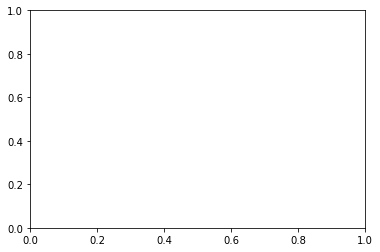

In [8]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
##plots the 'mass' of each detected particle
# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [9]:
f = tp.locate(frames[0], 13, invert=True, minmass=450)
##set min 'mass' to 450

NameError: name 'tp' is not defined

In [10]:
##print image before manually dropping non-particles
tp.annotate(f, frames[0])

NameError: name 'tp' is not defined

In [11]:
##batch does tp.locate on each frame
f = tp.batch(frames[:192], 13, minmass=450, invert=True)

NameError: name 'tp' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
##plots the 'mass' of each detected particle
# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [ ]:
##pass in f
## second parameter is maximum displacement
## third is the most frames a particle can disappear before it is forgotten from memory
t = tp.link_df(f, 10, memory=10)

In [ ]:
##goes through and saves each annotated frame as a png
for i in range(199):
    tp.annotate(f.loc[f["frame"] == i], frames[i]).figure.savefig("tempframes/f" + str(i))

In [ ]:
##gets the annotated frames and turns them into a video
img_array = []
for filename in glob.glob('tempframes/*.png'):
    img = cv2.imread(filename)
    height,width, layers = img.shape
    size = (width,height)
    img_array.append(img)
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
t1 = tp.filter_stubs(t, 15)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

In [ ]:

#t1 = t1[(t1.y < 50) & (t1.x <250)].index
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

plt.figure()
tp.annotate(t1,frames[0])

In [ ]:
t1 = t1[(t1.y < 50)].index
t1

In [ ]:
##filters out bad annotations
condition = lambda x: ((x['mass'].mean() > 825) & (x['size'].mean() < 8) &
                       (x['ecc'].mean() > 0.1))
t2 = tp.filter(t1, condition)  # a wrapper for pandas' filter that works around a bug in v 0.12

In [ ]:
plt.figure()
tp.annotate(t2,frames[0])

In [ ]:
##plots movements 
plt.figure()
tp.plot_traj(t2)